<a href="https://colab.research.google.com/github/udaykiranvucha/covid19-data-analysis-india/blob/main/Summer_Intern_Project_Covid_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

STEP 1: DATA **COLLECTION**

In [ ]:
# Importing Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [ ]:
# Importing total data set
df = pd.read_excel("/content/Copy of Covid_Analysis_India_Waves_2020_2022.xlsx")
df

,CaseID,Date,State,District,NewCases,Deaths,Recoveries,ICUAdmissions,MobilityIndex,FirstDose,SecondDose,BoosterDose,LockdownStage,Source,Wave
0,C27916,WrongDate,Maharashtra,Mumbai,376,3,344,23,79.490712,0,0,0,Full,Valid,First Wave
1,C14717,2020-03-01 00:00:00,Maharashtra,Pune,InvalidValue,0,89,5,76.922929,0,0,0,Full,Valid,First Wave
2,C45620,2020-03-01 00:00:00,Maharashtra,Nagpur,208,2,175,19,-10.000000,0,0,0,Full,Invalid,First Wave
3,C74650,2020-03-01 00:00:00,Delhi,North Delhi,267,2,218,16,69.264076,0,0,0,Full,Valid,First Wave
4,C98034,2020-03-01 00:00:00,Delhi,South Delhi,364,5,298,21,47.586595,0,0,0,Full,Invalid,First Wave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,C54592,2020-03-02 00:00:00,Tamil Nadu,Madurai,456,7,395,37,74.815407,0,0,0,Full,Invalid,First Wave
9978,C48367,2020-07-15 00:00:00,West Bengal,Howrah,631,11,531,43,41.634223,0,0,0,Full,Invalid,First Wave
9979,C74455,2020-07-18 00:00:00,Karnataka,Hubli,231,3,200,13,49.321514,0,0,0,Full,Invalid,First Wave
9980,C85593,2020-05-03 00:00:00,Uttar Pradesh,Kanpur,333,2,315,21,49.705365,0,0,0,Full,Valid,First Wave


STEP 2: DATA PREPARATION



In [ ]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9982 entries, 0 to 9981
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CaseID         9982 non-null   object 
 1   Date           9982 non-null   object 
 2   State          9982 non-null   object 
 3   District       9982 non-null   object 
 4   NewCases       9982 non-null   object 
 5   Deaths         9982 non-null   int64  
 6   Recoveries     9982 non-null   int64  
 7   ICUAdmissions  9982 non-null   int64  
 8   MobilityIndex  9982 non-null   float64
 9   FirstDose      9982 non-null   int64  
 10  SecondDose     9982 non-null   int64  
 11  BoosterDose    9982 non-null   int64  
 12  LockdownStage  9982 non-null   object 
 13  Source         9982 non-null   object 
 14  Wave           9982 non-null   object 
dtypes: float64(1), int64(6), object(8)
memory usage: 1.1+ MB
None
CaseID           0
Date             0
State            0
District         0
Ne

In [ ]:
#change date to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y', errors='coerce')
print(df['Date'].isnull().values)
df['Date'] #here one incorrect value in Date column

[ True False False ... False False False]


,Date
0,NaT
1,2020-03-01
2,2020-03-01
3,2020-03-01
4,2020-03-01
...,...
9977,2020-03-02
9978,2020-07-15
9979,2020-07-18
9980,2020-05-03


In [ ]:
#remove incorrect data row
df1 = df.dropna()
df1 #DISPLAY

,CaseID,Date,State,District,NewCases,Deaths,Recoveries,ICUAdmissions,MobilityIndex,FirstDose,SecondDose,BoosterDose,LockdownStage,Source,Wave
1,C14717,2020-03-01,Maharashtra,Pune,InvalidValue,0,89,5,76.922929,0,0,0,Full,Valid,First Wave
2,C45620,2020-03-01,Maharashtra,Nagpur,208,2,175,19,-10.000000,0,0,0,Full,Invalid,First Wave
3,C74650,2020-03-01,Delhi,North Delhi,267,2,218,16,69.264076,0,0,0,Full,Valid,First Wave
4,C98034,2020-03-01,Delhi,South Delhi,364,5,298,21,47.586595,0,0,0,Full,Invalid,First Wave
5,C70712,2020-03-01,Delhi,East Delhi,227,4,183,16,49.637980,0,0,0,Full,Invalid,First Wave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,C54592,2020-03-02,Tamil Nadu,Madurai,456,7,395,37,74.815407,0,0,0,Full,Invalid,First Wave
9978,C48367,2020-07-15,West Bengal,Howrah,631,11,531,43,41.634223,0,0,0,Full,Invalid,First Wave
9979,C74455,2020-07-18,Karnataka,Hubli,231,3,200,13,49.321514,0,0,0,Full,Invalid,First Wave
9980,C85593,2020-05-03,Uttar Pradesh,Kanpur,333,2,315,21,49.705365,0,0,0,Full,Valid,First Wave


In [ ]:
#NewCases column have also incorrect
df1['NewCases'] = pd.to_numeric(df1['NewCases'], errors="coerce")
print(df1["NewCases"].isnull().sum())
df2 = df1.dropna()
print(df2.info())

1
<class 'pandas.core.frame.DataFrame'>
Index: 9980 entries, 2 to 9981
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   CaseID         9980 non-null   object        
 1   Date           9980 non-null   datetime64[ns]
 2   State          9980 non-null   object        
 3   District       9980 non-null   object        
 4   NewCases       9980 non-null   float64       
 5   Deaths         9980 non-null   int64         
 6   Recoveries     9980 non-null   int64         
 7   ICUAdmissions  9980 non-null   int64         
 8   MobilityIndex  9980 non-null   float64       
 9   FirstDose      9980 non-null   int64         
 10  SecondDose     9980 non-null   int64         
 11  BoosterDose    9980 non-null   int64         
 12  LockdownStage  9980 non-null   object        
 13  Source         9980 non-null   object        
 14  Wave           9980 non-null   object        
dtypes: datetime64[ns](1), fl

<ipython-input-7-3927905563>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['NewCases'] = pd.to_numeric(df1['NewCases'], errors="coerce")


In [ ]:
#Corrected / Modified data by removing incorrected rows
df2

,CaseID,Date,State,District,NewCases,Deaths,Recoveries,ICUAdmissions,MobilityIndex,FirstDose,SecondDose,BoosterDose,LockdownStage,Source,Wave
2,C45620,2020-03-01,Maharashtra,Nagpur,208.0,2,175,19,-10.000000,0,0,0,Full,Invalid,First Wave
3,C74650,2020-03-01,Delhi,North Delhi,267.0,2,218,16,69.264076,0,0,0,Full,Valid,First Wave
4,C98034,2020-03-01,Delhi,South Delhi,364.0,5,298,21,47.586595,0,0,0,Full,Invalid,First Wave
5,C70712,2020-03-01,Delhi,East Delhi,227.0,4,183,16,49.637980,0,0,0,Full,Invalid,First Wave
6,C65322,2020-03-01,Karnataka,Bengaluru,217.0,1,178,21,85.289863,0,0,0,Full,Invalid,First Wave
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,C54592,2020-03-02,Tamil Nadu,Madurai,456.0,7,395,37,74.815407,0,0,0,Full,Invalid,First Wave
9978,C48367,2020-07-15,West Bengal,Howrah,631.0,11,531,43,41.634223,0,0,0,Full,Invalid,First Wave
9979,C74455,2020-07-18,Karnataka,Hubli,231.0,3,200,13,49.321514,0,0,0,Full,Invalid,First Wave
9980,C85593,2020-05-03,Uttar Pradesh,Kanpur,333.0,2,315,21,49.705365,0,0,0,Full,Valid,First Wave


**STEP 3: DATA ANALYSIS**

In [ ]:
#1. Trend Analysis Over Time
daily_cases = df2.groupby('Date')['NewCases'].sum()
daily_cases


,NewCases
Date,
2020-03-01,4354.0
2020-03-02,6117.0
2020-03-03,5870.0
2020-03-04,4935.0
2020-03-05,5996.0
...,...
2022-02-24,5201.0
2022-02-25,4478.0
2022-02-26,5233.0


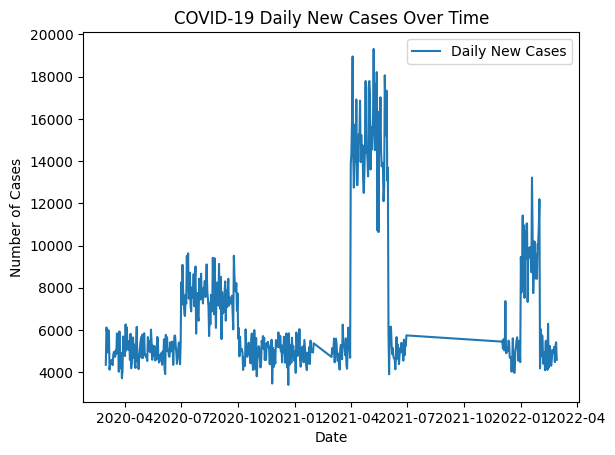

In [ ]:
# DAY WISE DATA ANALYSIS WITH LINE CHART
d_c_index = daily_cases.index
d_c_index
d_c_val = daily_cases.values
d_c_val
plt.plot(d_c_index , d_c_val , label = "Daily New Cases")
plt.title("COVID-19 Daily New Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Cases")
plt.legend()
plt.show()

MONTHLY-WISE DATA ANALYSIS

In [ ]:
from re import I
# month_wise DATA  analysis


#  Create a new column with only the month and year (as Period type)
df2['Month'] = df2['Date'].dt.to_period('M')  # YYYY-MM format
#  Group by Month and sum NewCases
monthly_cases = df2.groupby('Month')['NewCases'].sum()#.reset_index()
print(monthly_cases)
val = monthly_cases.values


Month
2020-03    151869.0
2020-04    153013.0
2020-05    154379.0
2020-06    151457.0
2020-07    240214.0
2020-08    238942.0
2020-09    225119.0
2020-10    154803.0
2020-11    147884.0
2020-12    157599.0
2021-01    152995.0
2021-03    156694.0
2021-04    441861.0
2021-05    469632.0
2021-06    152328.0
2021-12    156817.0
2022-01    300470.0
2022-02    138855.0
Freq: M, Name: NewCases, dtype: float64


<ipython-input-11-3801880750>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Date'].dt.to_period('M')  # YYYY-MM format


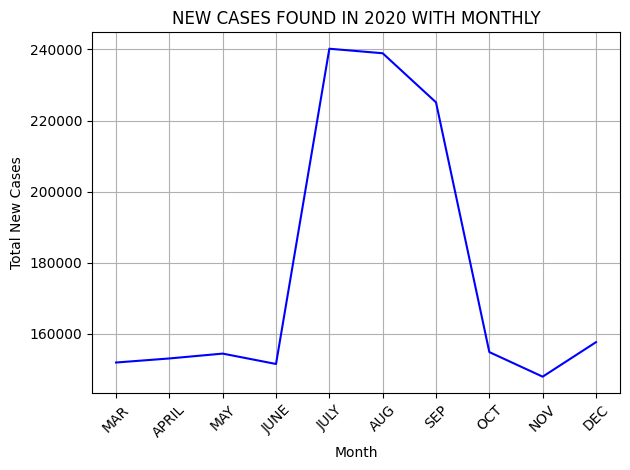

In [ ]:
plt.plot( ['MAR', 'APRIL', 'MAY', 'JUNE', 'JULY', 'AUG',
             'SEP', 'OCT', 'NOV', 'DEC'] , [151869, 153013, 154379, 151457, 240214, 238942, 225119,
       154803, 147884, 157599 ], color='blue')
plt.title("NEW CASES FOUND IN 2020 WITH MONTHLY")
plt.xlabel("Month")
plt.ylabel("Total New Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


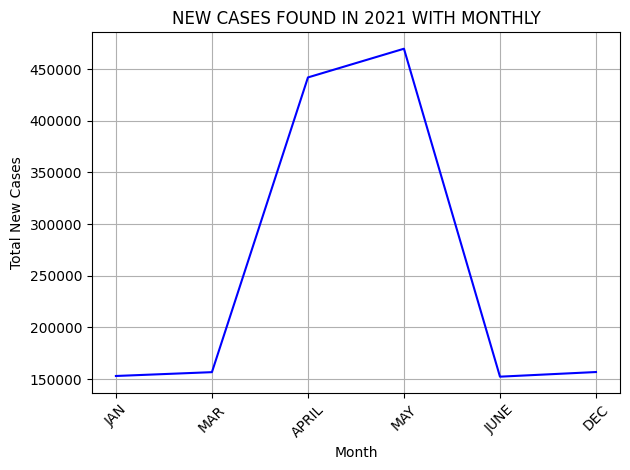

In [ ]:
#2021 data in month wise
m = ['JAN', 'MAR' , 'APRIL', 'MAY', 'JUNE', 'DEC']
v = [152995, 156694, 441861, 469632,
       152328, 156817]

plt.plot(m , v , color = 'blue')
plt.title("NEW CASES FOUND IN 2021 WITH MONTHLY")
plt.xlabel("Month")
plt.ylabel("Total New Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


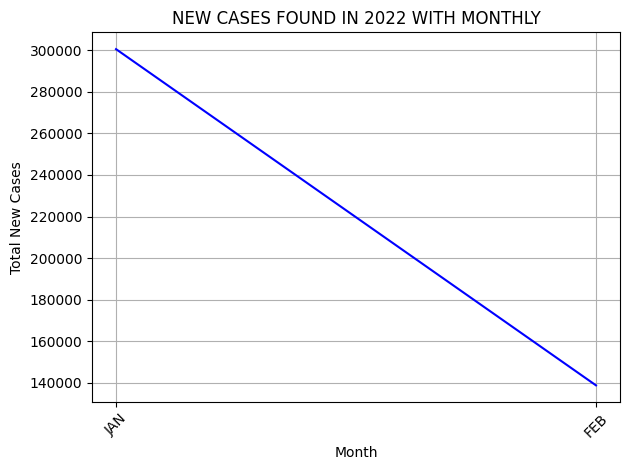

In [ ]:
#2022 DATA
m = ['JAN' , 'FEB']
v = [300470, 138855]
plt.plot(m , v , color = "blue")
plt.title("NEW CASES FOUND IN 2022 WITH MONTHLY")
plt.xlabel("Month")
plt.ylabel("Total New Cases")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


TOTAL CASES FOUND BY STATES

               NewCases  Recoveries  Deaths
State                                      
Delhi          606139.0      529629    6711
Karnataka      626262.0      548879    6985
Maharashtra    621870.0      543696    6917
Tamil Nadu     625095.0      545682    7046
Uttar Pradesh  640137.0      559744    7177
West Bengal    625428.0      546570    7044


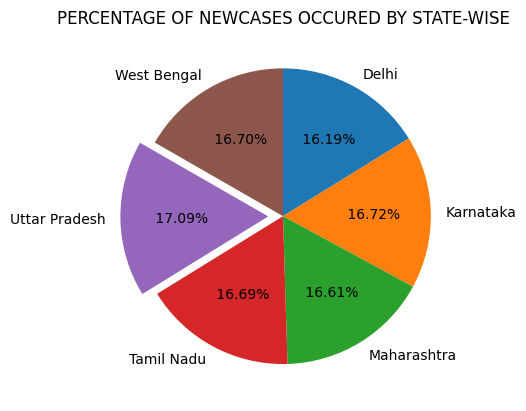

,Recoveries
State,
Delhi,529629
Karnataka,548879
Maharashtra,543696
Tamil Nadu,545682
Uttar Pradesh,559744
West Bengal,546570


In [ ]:
df2
grp_totcases = df2.groupby('State')[['NewCases','Recoveries','Deaths']].sum()
print(grp_totcases)
states = ['Delhi','Karnataka','Maharashtra','Tamil Nadu','Uttar Pradesh','West Bengal']
cases = [606139,626262,621870,625095,640137,625428]
plt.pie(cases , labels = states , startangle = 90 , counterclock = False , autopct='% 4.2f%%' , explode=[0,0,0,0,0.1,0] )
plt.title("PERCENTAGE OF NEWCASES OCCURED BY STATE-WISE")
plt.show()
grp_totcases.Recoveries

In [ ]:
grp_wise_data = df2.groupby('Wave')[['NewCases' , 'Deaths' , 'Recoveries']]
grp_wise_data.sum()


,NewCases,Deaths,Recoveries
Wave,,,
First Wave,1928274.0,21026,1685173
Second Wave,1220515.0,14181,1067857
Third Wave,596142.0,6673,521170


In [ ]:
bar_width = 0.6
centers = np.array([2,6,10,14,18,22])
newcases_center = centers + bar_width / 2
newcases_center
deaths_center = centers - bar_width / 2
deaths_center
#recoveries_center = centers + bar_width / 2
#plt.bar(['states' , [192827 , 1220515 , 596142] , width=0.5)
#plt.bar(['First Wave' , 'Second Wave' , 'Third Wave'] , [1220515 , 14181 , 1067857] , width=0.5)


array([ 1.7,  5.7,  9.7, 13.7, 17.7, 21.7])

<ipython-input-33-4008620995>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


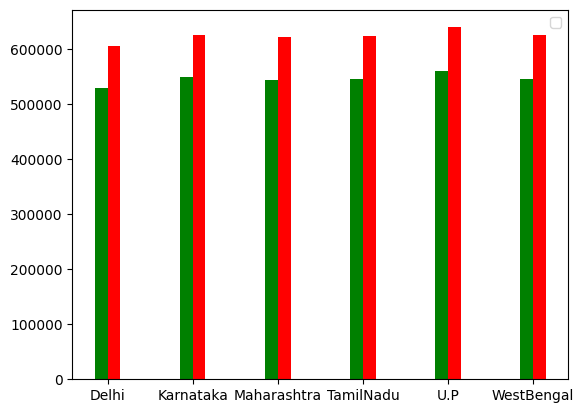

In [ ]:
#newcases_center
plt.bar(newcases_center , [606139,626262,621870,625095,640137,625428] , width=0.6 , color='red')
plt.bar(deaths_center , [529629,548879,543696,545682,559744,546570] , width=0.6 , color='green')
thicks = ["Delhi","Karnataka","Maharashtra","TamilNadu","U.P","WestBengal"]
x = np.arange(len(thicks))
plt.xticks([2,6,10,14,18,22] , thicks)
plt.legend()
plt.show()

In [ ]:
#recoveries_center

array([0.6, 1.2, 1.8])

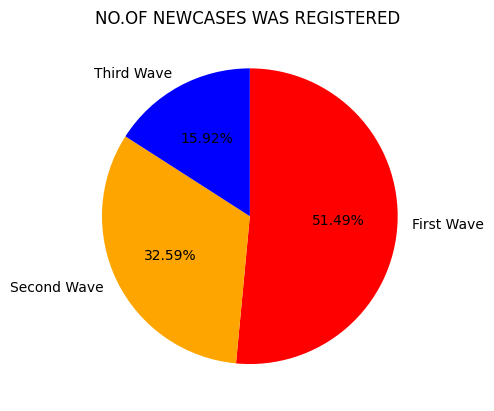

In [ ]:
#NEW CASES DATA
waves = ['First Wave','Second Wave','Third Wave']
val = [1928274, 1220515 , 596142]
plt.pie(val , labels = waves, startangle = 90 , counterclock = False , autopct='%4.2f%%',colors=color )
plt.title("NO.OF NEWCASES WAS REGISTERED ")
plt.show()


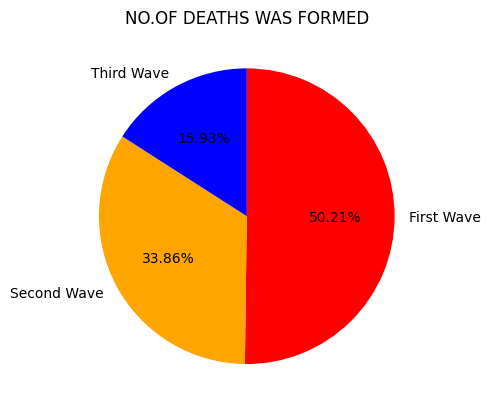

In [ ]:
#DEATHS DATA
plt.pie([21026 , 14181 , 6673] , labels = waves , startangle = 90 , counterclock = False , autopct='%4.2f%%', colors=color )
plt.title("NO.OF DEATHS WAS FORMED")
plt.show()


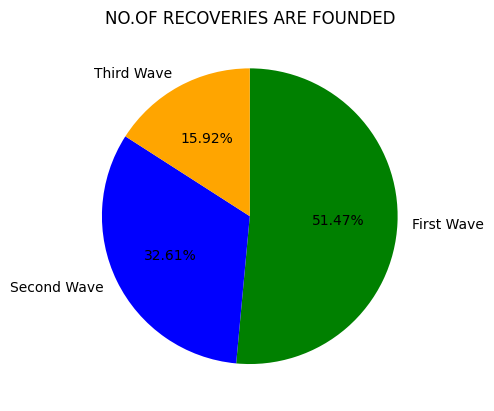

In [ ]:
 color = ['red','orange','blue']
plt.pie([1685173 , 1067857 , 521170] , labels = waves , startangle = 90 , counterclock = False , autopct='%4.2f%%' , colors = ['green','blue','orange'] )
plt.title("NO.OF RECOVERIES ARE FOUNDED")
plt.show()

In [ ]:
Admission_data = df2.groupby('Wave')['ICUAdmissions']
Admission_data.sum()

,ICUAdmissions
Wave,
First Wave,141330
Second Wave,90086
Third Wave,43768


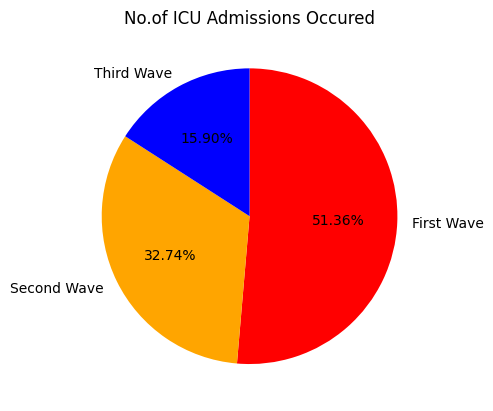

In [ ]:
plt.pie([141330 , 90086 , 43768] , labels = ['First Wave','Second Wave','Third Wave'] , startangle = 90 , counterclock = False , autopct='%4.2f%%', colors = ['red','orange','blue'] )
plt.title("No.of ICU Admissions Occured")
plt.show()

In [ ]:
df2

,CaseID,Date,State,District,NewCases,Deaths,Recoveries,ICUAdmissions,MobilityIndex,FirstDose,SecondDose,BoosterDose,LockdownStage,Source,Wave,Month
2,C45620,2020-03-01,Maharashtra,Nagpur,208.0,2,175,19,-10.000000,0,0,0,Full,Invalid,First Wave,2020-03
3,C74650,2020-03-01,Delhi,North Delhi,267.0,2,218,16,69.264076,0,0,0,Full,Valid,First Wave,2020-03
4,C98034,2020-03-01,Delhi,South Delhi,364.0,5,298,21,47.586595,0,0,0,Full,Invalid,First Wave,2020-03
5,C70712,2020-03-01,Delhi,East Delhi,227.0,4,183,16,49.637980,0,0,0,Full,Invalid,First Wave,2020-03
6,C65322,2020-03-01,Karnataka,Bengaluru,217.0,1,178,21,85.289863,0,0,0,Full,Invalid,First Wave,2020-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9977,C54592,2020-03-02,Tamil Nadu,Madurai,456.0,7,395,37,74.815407,0,0,0,Full,Invalid,First Wave,2020-03
9978,C48367,2020-07-15,West Bengal,Howrah,631.0,11,531,43,41.634223,0,0,0,Full,Invalid,First Wave,2020-07
9979,C74455,2020-07-18,Karnataka,Hubli,231.0,3,200,13,49.321514,0,0,0,Full,Invalid,First Wave,2020-07
9980,C85593,2020-05-03,Uttar Pradesh,Kanpur,333.0,2,315,21,49.705365,0,0,0,Full,Valid,First Wave,2020-05
